In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats
from scipy.stats import truncnorm

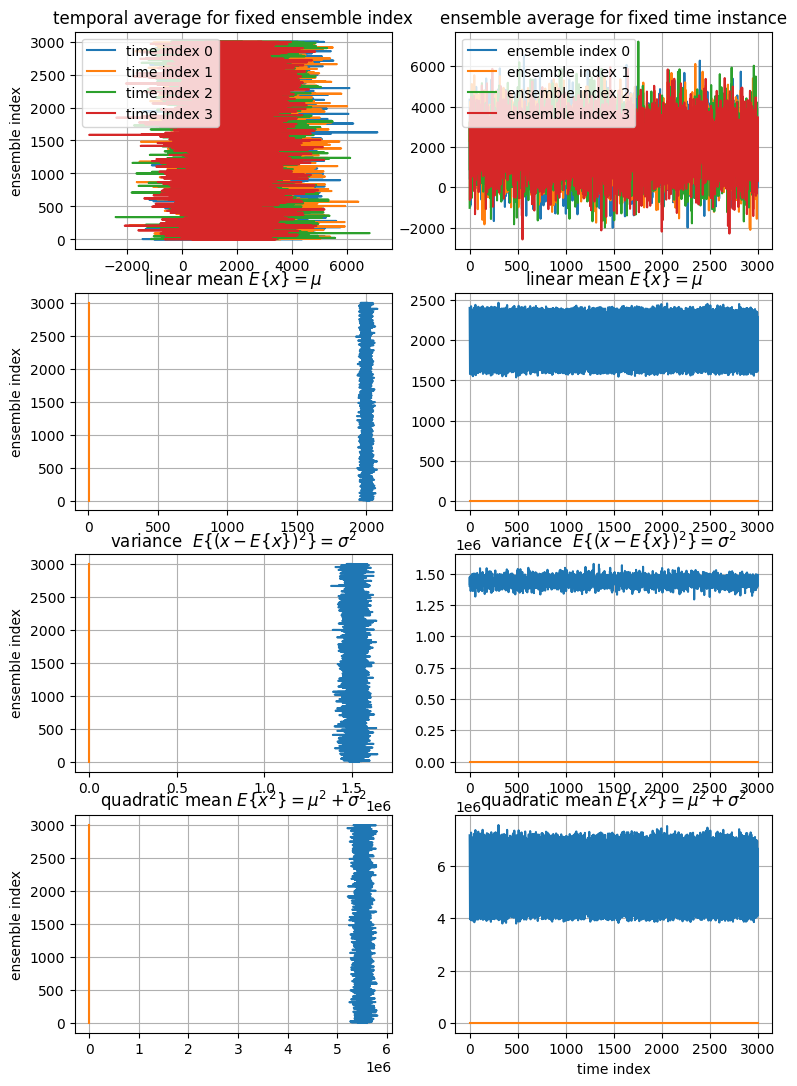

In [5]:
f = 400
a = 400.25
b = 399.75
N = 3000

# create random process based on normal distribution
Ns = N  # number of samples to set up an ensemble
Nt = N  # number of time steps to set up 'ensemble over time'-characteristics
np.random.seed(1)

s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

loc, scale = 5, 3  # mu, sigma
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt]) * b

tmp = a*np.cos(2 * f*np.pi/Nt * np.arange(0, Nt))
x = x + np.tile(tmp, (Ns, 1))

fig, axs = plt.subplots(4, 2, figsize=(9, 13))
# plot signals
for i in range(4):
    axs[0, 0].plot(x[:, i], s, label='time index '+str(i))
    axs[0, 1].plot(t, x[i, :], label='ensemble index '+str(i))
# plot means
axs[1, 0].plot(np.mean(x, axis=1), s)
axs[1, 1].plot(t, np.mean(x, axis=0))
axs[1, 0].plot([loc, loc], [0, Ns])
axs[1, 1].plot([0, Nt], [loc, loc])
# plot variance
axs[2, 0].plot(np.var(x, axis=1), s)
axs[2, 1].plot(t, np.var(x, axis=0))
axs[2, 0].plot([scale**2, scale**2], [0, Ns])
axs[2, 1].plot([0, Nt], [scale**2, scale**2])
# plot quadratic mean
axs[3, 0].plot(np.mean(x**2, axis=1), s)
axs[3, 1].plot(t, np.mean(x**2, axis=0))
axs[3, 0].plot([loc**2+scale**2, loc**2+scale**2], [0, Ns])
axs[3, 1].plot([0, Nt], [loc**2+scale**2, loc**2+scale**2])
# labeling
axs[3, 1].set_xlabel('time index')
for i in range(4):
    #axs[i,1].set_xlabel('time index')
    axs[i, 0].set_ylabel('ensemble index')
    for j in range(2):
        axs[i, j].grid(True)
axs[0, 0].set_title(r'temporal average for fixed ensemble index')
axs[0, 1].set_title(r'ensemble average for fixed time instance')
for i in range(2):
    axs[0, i].legend(loc='upper left')
    axs[1, i].set_title(r'linear mean $E\{x\} = \mu$')
    axs[2, i].set_title(r'variance  $E\{(x -E\{x\} )^2\} = \sigma^2$')
    axs[3, i].set_title(r'quadratic mean $E\{x^2\} = \mu^2+\sigma^2$')

In [3]:
def my_xcorr(x, y):
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

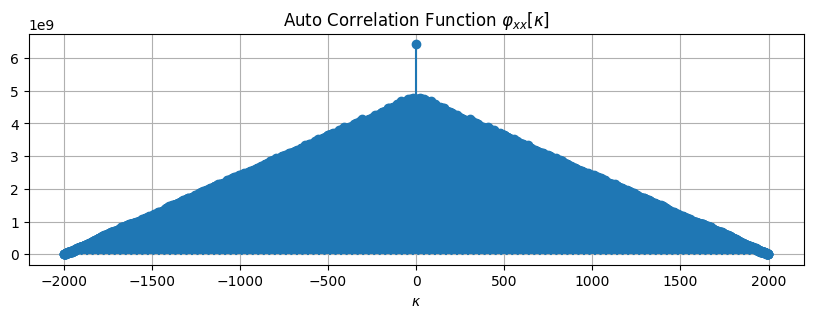

In [4]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 1, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'Auto Correlation Function $\varphi_{xx}[\kappa]$')
plt.grid(True)